In [101]:
#This is an university coursed based project which has done by Ardavan shahoveisi for Artificial Inteligence for CyberSecurity 

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import tree, __all__, model_selection, preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [102]:
# take data
data = pd.read_csv(r"C:\Users/39348/Downloads/trainDdosLabelNumeric.csv")
datatest = pd.read_csv(r"C:\\Users\\39348\\Downloads\\testDdosLabelNumeric.csv")

In [103]:
df = pd.DataFrame(data)
dftest=pd.DataFrame(datatest)

In [104]:
# form dataframe
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,71271,6,7,874.0,3745.0,431.0,0.0,145.666667,221.034537,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,2,1,2,31.0,12.0,31.0,31.0,31.000000,0.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,6,1,2,0,37.0,0.0,31.0,6.0,18.500000,17.677670,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,17,20623,2,2,90.0,122.0,45.0,45.0,45.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [105]:
df.shape

(10000, 79)

In [106]:
df.dropna()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,71271,6,7,874.0,3745.0,431.0,0.0,145.666667,221.034537,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,2,1,2,31.0,12.0,31.0,31.0,31.000000,0.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,6,1,2,0,37.0,0.0,31.0,6.0,18.500000,17.677670,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,17,20623,2,2,90.0,122.0,45.0,45.0,45.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,17,1,2,0,458.0,0.0,229.0,229.0,229.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9996,17,2,2,0,458.0,0.0,229.0,229.0,229.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9997,17,47,2,0,458.0,0.0,229.0,229.0,229.000000,0.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
9998,17,49,2,0,458.0,0.0,229.0,229.0,229.000000,0.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [107]:
# for pre-elaboration
cols = list(df.columns.values)  # we take a list an Index type from pandas library and return attribute labels as array
description = df.describe()
#description = ts_test.describe()

In [108]:
def removeColumns(df, columns):
    '''
    Remove the columns in which minimum value and maximum value are the same inside the DataFrame.
    :param dataframe:
    :param columns:
    :return:
    '''
    removed_columns = []
    shape = df.shape
    for c in columns:
        # Passing the attribute directly, taking the minimum and the maximum
        if df[c].min() == df[c].max():
            removed_columns.append(c)
    df = df.drop(columns=removed_columns)
    print('Removed columns: ', removed_columns)
    print('Dim before the removal: ', shape)
    print('Dim after the removal: ', df.shape)
    return df, removed_columns
df, removed = removeColumns(df, cols)

Removed columns:  [' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' PSH Flag Count', ' ECE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
Dim before the removal:  (10000, 79)
Dim after the removal:  (10000, 67)


In [109]:
df.shape

(10000, 67)

In [110]:
df['Label'].value_counts()

0    3000
1    2000
2    2000
3    2000
4    1000
Name: Label, dtype: int64

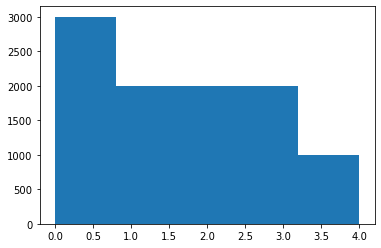

In [111]:
plt.hist(df['Label'] , bins=5)
plt.show()

In [112]:
def stratifiedKFold(X, y, folds, seed):
  
    skf = model_selection.StratifiedKFold(n_splits=folds, random_state=seed, shuffle=True)

    # empty lists declaration
    xTrainList = []
    xTestList = []
    yTrainList = []
    yTestList = []

    # looping over split, the output is formed by couple of test set and training set
    # iloc allow accessing to specific position of dataFrame when the index label of a dataframe is something other than numeric series.
    for trainIndex, testIndex in skf.split(X, y):
        print("TRAIN:", trainIndex, "TEST:", testIndex)
        xTrainList.append(X.iloc[trainIndex])
        xTestList.append(X.iloc[testIndex])
        yTrainList.append(y.iloc[trainIndex])
        yTestList.append(y.iloc[testIndex])
    return xTrainList, xTestList, yTrainList, yTestList

In [113]:
cols = list(df.columns.values)
independentList = cols[0:df.shape[
                             1] - 1]
print('Independent list: ', independentList)  # print all the dataset without the columns class
target = 'Label'
X = df.loc[:, independentList]  # Projection of the original dataset on the independent attributes
y = df[target]  # projection of the original dataset on the class
folds = 5
seed = 43
np.random.seed(seed)

ListXTrain, ListXTest, ListYTrain, ListYTest = stratifiedKFold(X, y, folds, seed)

print(ListXTest)
print(ListXTrain)
print(ListYTest)
print(ListYTrain)

Independent list:  [' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow_Bytes', 'Flow_Packets', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd_Packets', 'Bwd_Packets', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Siz

Number of nodes:  29
Number of leaves:  15


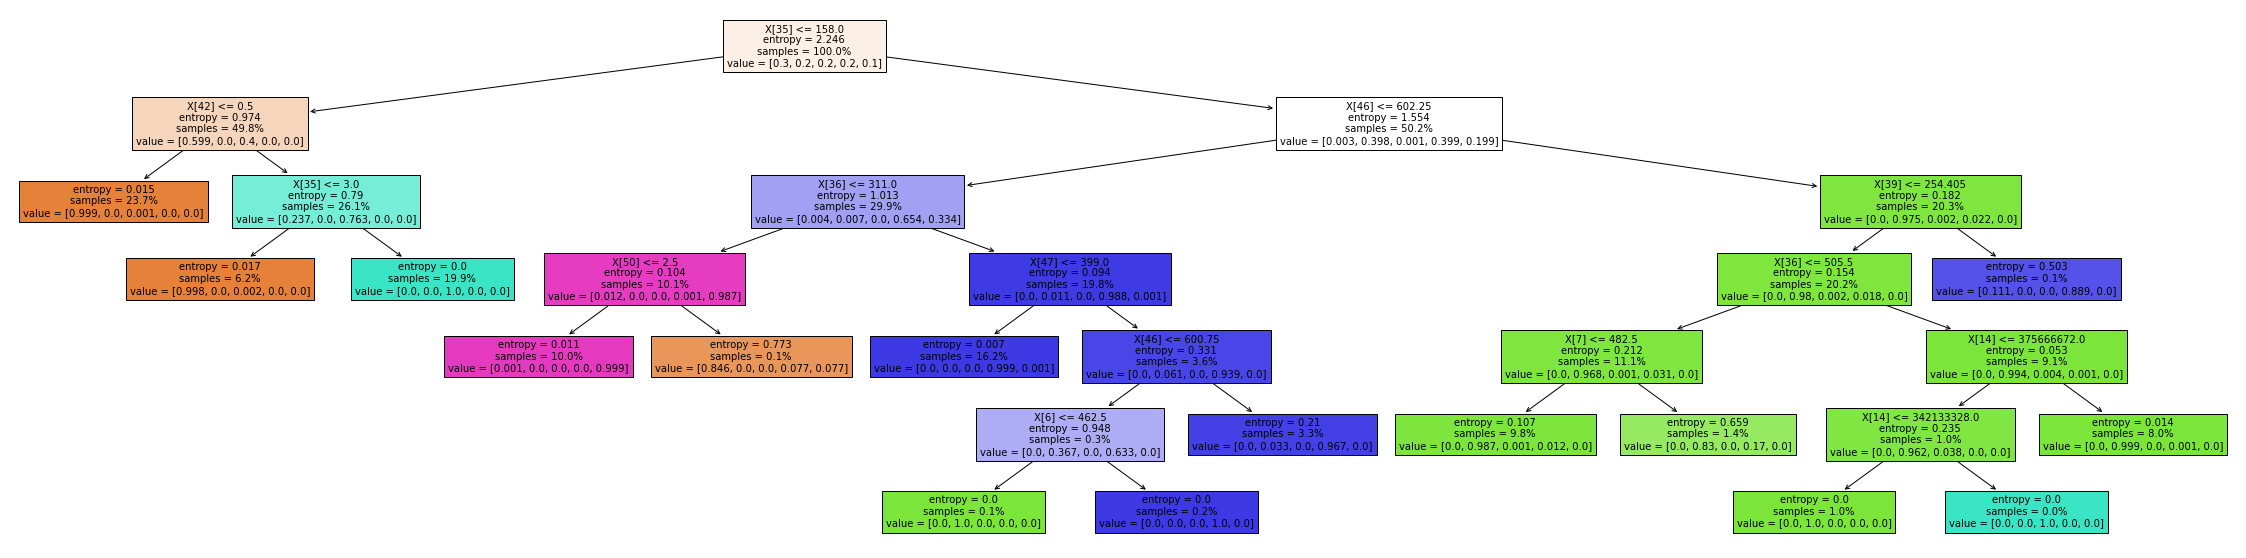

In [114]:
def decisionTreeLearner(X, y, criterion, ccp_alpha, seed):
    

    tree = DecisionTreeClassifier(criterion=criterion, random_state=seed, ccp_alpha=ccp_alpha)
    tree.fit(X, y)
    return tree


def showTree(T):
    plt.figure(figsize=(40, 10))
    plot_tree(T, filled=True, fontsize=10, proportion=True)
    n_nodes = T.tree_.node_count
    n_leaves = T.get_n_leaves()
    print('Number of nodes: ', n_nodes)
    print('Number of leaves: ', n_leaves)
plt.show()

t = decisionTreeLearner(X, y, 'entropy', 0.001, seed)
showTree(t)

In [115]:
def decisionTreeF1(YTest, XTest, tree):
    """
    with This method desicion tree we are allowed to compute the f1score as metric to evaluate the classification task.
    Measuring the performance of the decision tree on the testing set passed as argument.
    :param YTest: Projection of the test set on the class
    :param XTest: Projection of the test set on the independent attributes
    :param tree:
    :return:
    """
    y_pred = tree.predict(XTest)
    score = f1_score(YTest, y_pred, average='weighted')
    return score

In [116]:
def determineDecisionTreekFoldConfiguration(xTrainList, xTestList, yTrainList, yTestList, seed):
    """
    This function perform some iteration to identify what is the best decision tree configuration in respect of the
    criterion and ccp_alpha. For each parameter setup we have to compute on each trial of the cross-validation: on the
    training the tree with configuration, compute the evaluation metrics on the 5 testing set and compute the average
    of the metrics. At the end will return the configuration of decision tree that maximize the weighted f1score computed
    on the 5-folds cross validation.
    :param xTrainList: is an array of 5 trials generated from the training set projected on independent variable
    :param xTestList: is an array of 5 trials generated from testing set projected on the independent variable
    :param yTrainList: is an array of 5 trials generated from the training set projected on labels
    :param yTestList: is an array of 5 trails generated from testing set projected on labels
    :param seed: seed is a value to randomize the split, guarantee the same results generated in each iteration.
                 It should be a number that control the sequence of random numbers that are generated.
                 Must be set one seed and use the same seed in the project.
                 The important thing is that if the script is run twice, it should construct the same cross-validation of the original data
    :return: the best value of ccp_alpha, f1score and criterion evaluating them on each trial
    """
    criterions = ['entropy', 'gini']
    bestCcp_alpha = 0
    best_criterion = ''
    bestF1_score = 0
    minRange = 0
    maxRange = 0.05
    step = 0.001

    for i in np.arange(minRange, maxRange, step):
        for criterion in criterions:
            f1 = []
            for x, y, z, w in zip(xTrainList, yTrainList, xTestList, yTestList):
                t = decisionTreeLearner(x, y, criterion, i, seed)
                f1.append(decisionTreeF1(w, z, t))
            avgF1 = np.mean(f1)
            print("average F1 score: ", avgF1)
            if avgF1 > bestF1_score:
                bestF1_score = avgF1
                best_criterion = criterion
                bestCcp_alpha = i
    return bestF1_score, bestCcp_alpha, best_criterion


In [117]:
best_f1_score, best_ccp_alpha, best_criterion = determineDecisionTreekFoldConfiguration(ListXTrain, ListXTest,
                                                                                        ListYTrain, ListYTest, seed)

print('best F1 score is: ', best_f1_score)
print('best ccp_alpha: ', best_ccp_alpha)
print('best criterion', best_criterion)

average F1 score:  0.9917996037530958
average F1 score:  0.9913007490489003
average F1 score:  0.9935004171074384
average F1 score:  0.9921017884627312
average F1 score:  0.9932010266955352
average F1 score:  0.9908071595580669
average F1 score:  0.992601141724452
average F1 score:  0.9905091335785416
average F1 score:  0.992601141724452
average F1 score:  0.9905091335785416
average F1 score:  0.9924014082244547
average F1 score:  0.9905091335785416
average F1 score:  0.9921019829687919
average F1 score:  0.9905091335785416
average F1 score:  0.9918034628876443
average F1 score:  0.9905091335785416
average F1 score:  0.9918034628876443
average F1 score:  0.9905091335785416
average F1 score:  0.9913053649075405
average F1 score:  0.9905091335785416
average F1 score:  0.9911068500098745
average F1 score:  0.9905091335785416
average F1 score:  0.9906067185911411
average F1 score:  0.9905091335785416
average F1 score:  0.9906067185911411
average F1 score:  0.9905091335785416
average F1 sco

Number of nodes:  29
Number of leaves:  15
[' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow_Bytes', 'Flow_Packets', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd_Packets', 'Bwd_Packets', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' Down/Up Ratio', ' Average Packet Size

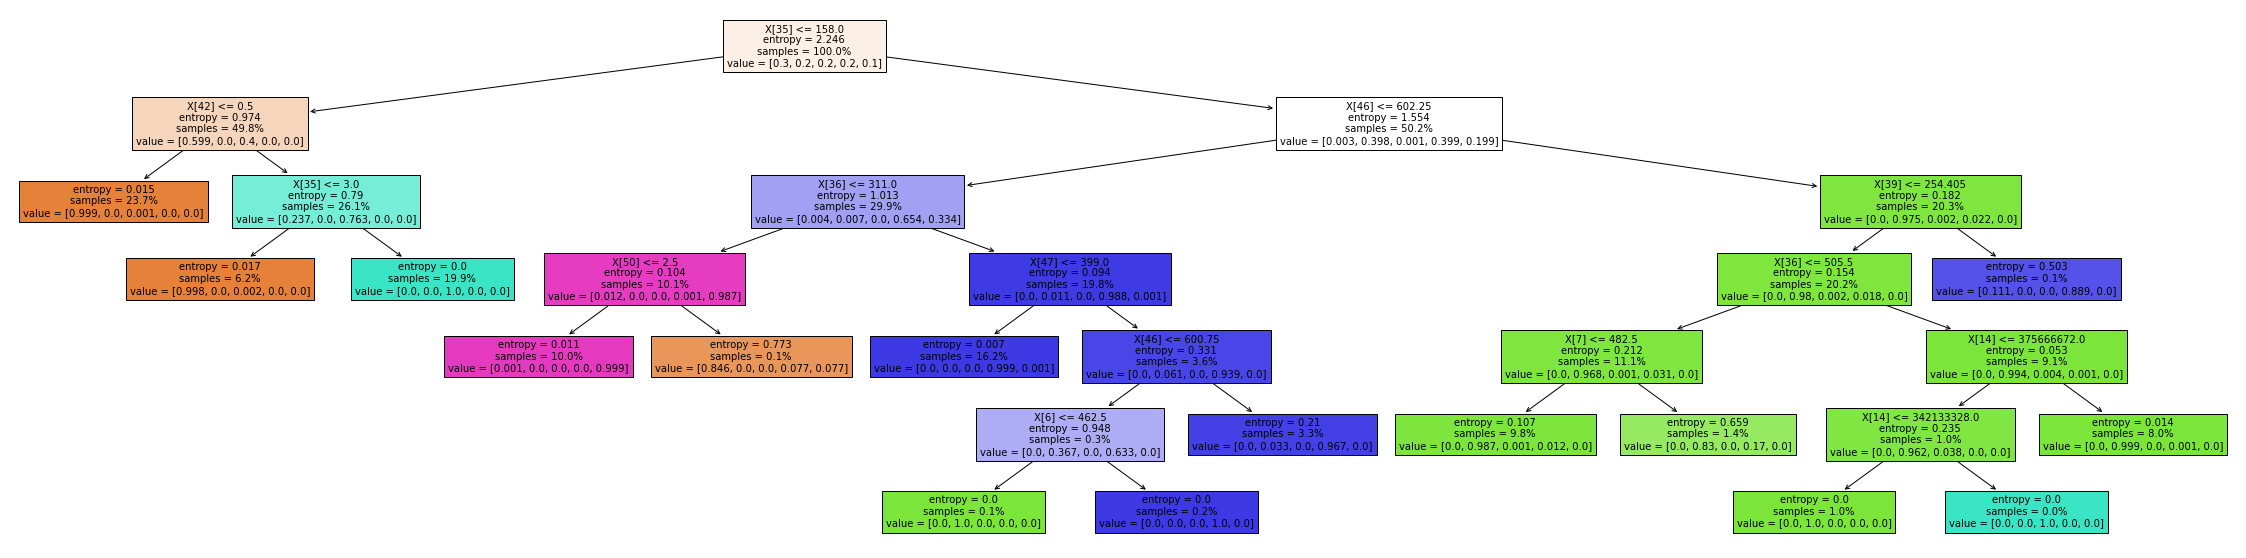

In [118]:
new_tree = decisionTreeLearner(X, y, best_criterion, best_ccp_alpha, seed)
showTree(new_tree)

datatest = datatest.drop(columns=removed)
cols_test = list(datatest.columns.values)
independentList = cols[0:datatest.shape[1] - 1]
print(independentList)
target = 'Label'
X_test = datatest.loc[:, independentList]
y_test = datatest[target]
yPred = new_tree.predict(X_test)  # Predict class or regression value for X.
score = decisionTreeF1(y_test, X_test, new_tree)
print(score)

In [119]:
def compute_confusion_matrix(y_test, yPred, new_tree):
    """
    The main diagonal shows how many examples are correctly predicted.
    On the x axis there are the effectively classes predicted from the tree.
    On the y axis there are the ones presented in label columns and from test set.
    :param y_test:
    :param yPred: Predict class or regression value for Y.
    :param new_tree:
    :return:
    """
    cm = confusion_matrix(y_test, yPred, labels=new_tree.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=new_tree.classes_)
    disp.plot()
    plt.show()
    print(classification_report(y_test, new_tree.predict(X_test), labels=[0, 1, 2, 3, 4]))
    compute_confusion_matrix(y_test, yPred, new_tree)

In [120]:
def assign_class_to_cluster(y, kmeans_labels):
    """
    Each examples that belong to the corresponding clusters. Assign each cluster computed on the training set to a class based on purity.
    :param y:
    :param kmeans_labels: kmeans_labels return all the labels to identify the clusters.
    :return:
    """
    clusters = set(kmeans_labels)  # create a set of labels removing the duplicates.
    classes = set(y)
    class_to_cluster = []
    N = 0
    purity = 0
    
    # loop through the clusters cardinality chosen before
    for n in clusters:
        '''
        Create an array of values, each values correspond to the n-th index of the element of cluster labels
        starting from n = 0, will found all the values 0 in kmeans_labels storing the position of all the labels inside indices
        Contain all the positions of n-th value looping over the clusters
        '''

        indices = [i for i in range(len(kmeans_labels)) if kmeans_labels[i] == n]
        
                # take the predictions on the n-th cluster
        # Same size of indices, containing the class associated to the clusters
        selected_classes = [y[i] for i in indices]
        max_class = 0
        max_predicted_class_frequency = 0

        for cl in classes:
            # counting on the clusters the occurrence of the classes IN EACH CLUSTER
            predicted_class_frequency = selected_classes.count(cl)
            # computing the cardinality of clusters
            N = N + predicted_class_frequency
            if predicted_class_frequency > max_predicted_class_frequency:
                max_predicted_class_frequency = predicted_class_frequency
                max_class = cl
        # max_class is the class that has the majority in the cluster c
        purity = purity + max_predicted_class_frequency
        # the nearest class for each of the 25 clusters
        class_to_cluster.append(max_class)
    '''
    computing the purity with the formula. Sum of the most frequent class in each cluster 
    divided by the overall number of classes in all the clusters
    '''
    purity = purity / N
    return clusters, class_to_cluster, purity

The scaled train_data are the following: 
[[3.52941176e-01 0.00000000e+00 1.11358575e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.52941176e-01 5.94164770e-04 5.56792873e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.52941176e-01 8.33681451e-09 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 3.83493467e-07 1.11358575e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 4.00167096e-07 1.11358575e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.91830282e-07 1.11358575e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

The scaled test_data are the following: 
[[3.52941176e-01 4.39955138e-07 7.22021661e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.52941176e-01 9.95981670e-01 1.26353791e-01 ... 2.64483445e-02
  1.00000000e+00 9.82617226e-01]
 [1.00000000e+00 1.76481235e-04 3.61010830e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e

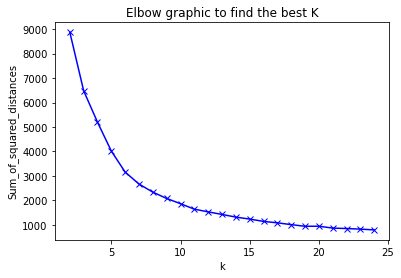

In [121]:
train_cluster_scaled = preprocessing.minmax_scale(X)
print('The scaled train_data are the following: ')
print(train_cluster_scaled, '\n')
test_cluster_scaled = preprocessing.minmax_scale(X_test)
print('The scaled test_data are the following: ')
print(test_cluster_scaled, '\n')

inertia = []

# looping over random k to compute kmeans on scaled train data
K = range(2, 25)
for k in K:
    print("Computing clustering with number of cluster: ", k)
    km = KMeans(n_clusters=k)
    km = km.fit(train_cluster_scaled)
    inertia.append(km.inertia_)  # lower inertia values, better clustering
    
print('\nSum of squared distances: ')
print(inertia)

plt.plot(K, inertia, 'bx-')  # the parameter bx- is useful to insert the legenda on the elbow graphic
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow graphic to find the best K')
plt.show()

clusters:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
class_to_cluster [3, 1, 2, 0, 0, 0, 2, 2, 0, 1]
purity:  0.6776
[3 8 0 0 4 0 0 6 3 0 0 4 5 4 3 3 3 0 0 3 5 0 0 3 7 0 5 3 3 0 3 3 0 3 3 0 4
 7 3 3 3 3 0 4 0 4 6 0 4 3 0 0 3 4 3 0 0 3 6 1 0 0 3 0 4 0 5 0 0 3 4 9 0 0
 4 8 0 6 3 0 0 0 0 3 6 0 3 0 4 0 3 5 4 3 6 1 0 3 8 4 3 7 4 3 0 0 0 3 4 8 0
 0 0 0 4 6 3 8 3 4 3 6 0 3 3 5 4 0 0 3 0 3 6 6 5 0 0 3 5 1 3 3 4 3 3 3 4 3
 3 0 1 6 1 4 3 5 4 6 4 8 7 1 6 0 4 0 3 4 0 4 4 0 4 4 0 3 0 0 0 6 2 4 0 3 0
 4 4 4 3 0 0 0 3 4 3 8 4 0 3 0 0 4 4 5 3 3 0 3 0 6 6 3 6 5 8 0 3 0 8 3 3 3
 3 0 0 0 4 5 5 3 0 8 0 4 3 3 3 5 3 0 5 4 3 8 3 6 7 0 3 1 3 4 0 7 0 3 6 0 4
 5 6 3 5 8 0 0 6 5 4 0 4 0 0 0 3 0 8 0 0 5 0 3 0 6 5 8 0 0 5 0 4 6 8 6 5 7
 3 0 4 3 1 1 1 0 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 9 1
 1 1 9 1 1 9 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 9 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 9 1 9 1 1 0 1 1 1 1 0 1 9 0 1 1 1 1 1 1 1 1 0 9 1 9 1 0 1 1 1 1 9
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 9 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 

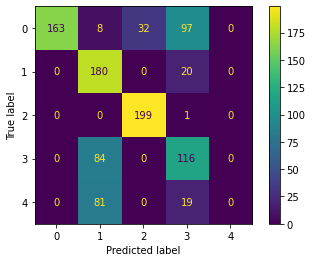

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       300
           1       0.51      0.90      0.65       200
           2       0.86      0.99      0.92       200
           3       0.46      0.58      0.51       200
           4       0.00      0.00      0.00       100

    accuracy                           0.66      1000
   macro avg       0.57      0.60      0.56      1000
weighted avg       0.67      0.66      0.63      1000



C:\Users\39348\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\39348\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\39348\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
best_K = 10
km = KMeans(n_clusters=best_K, random_state=seed)
km = km.fit(train_cluster_scaled)

clusters, class_to_cluster, purity = assign_class_to_cluster(y, kmeans_labels=km.labels_)
print("clusters: ", clusters)
print("class_to_cluster", class_to_cluster)
print("purity: ", purity)

'''
For each testing sample determine the cluster with the closest centroid according to
K-means clustering
'''

clustering_predictions_test = km.predict(test_cluster_scaled)
print(clustering_predictions_test)

# Determine the class given the closest cluster for each test sample
predictions_test = [class_to_cluster[c] for c in clustering_predictions_test]
print(predictions_test)

cf_mat = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_mat)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_test))